# Modelling gender pay gap data

Aim is to get insights from different models and compare. This would help direct future data collection, too.

Getting insights is probably more important than predictions for this dataset since it is unclear what may be the cause of gender pay gap.

### Some assumptions: 

- From data exploration and through gender pay gap reports we see the difference in number of women and men in upper quartile and lower quartile to be a potential factor. 
- We believe the company size could also play a role because ...
- Gender pay gap can be more obvious in some industries than others

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
url = 'data/gender-pay-gap-uk-gov/2018.csv.gz'
data = pd.read_csv(url, compression='gzip')
data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,83.0,25.0,75.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00:00,03/04/2019 15:43:17
4,1509 GROUP,"Royal Grammar School,\r\nHigh Street,\r\nGuild...",04104101,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,...,51.6,61.3,38.7,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),250 to 499,1509 GROUP,False,05/04/2019 00:00:00,18/03/2019 14:03:16


In [15]:
data.shape

(10817, 25)

In [16]:
#Columns that have a single value for all rows do not contain any information for modeling.

print(data.nunique())

EmployerName                 10817
Address                       9313
CompanyNumber                 9478
SicCodes                      2004
DiffMeanHourlyPercent          851
DiffMedianHourlyPercent        891
DiffMeanBonusPercent          1712
DiffMedianBonusPercent        1761
MaleBonusPercent               978
FemaleBonusPercent             974
MaleLowerQuartile              977
FemaleLowerQuartile            977
MaleLowerMiddleQuartile        982
FemaleLowerMiddleQuartile      982
MaleUpperMiddleQuartile        976
FemaleUpperMiddleQuartile      976
MaleTopQuartile                946
FemaleTopQuartile              946
CompanyLinkToGPGInfo          6244
ResponsiblePerson             7509
EmployerSize                     7
CurrentName                  10816
SubmittedAfterTheDeadline        2
DueDate                          2
DateSubmitted                10695
dtype: int64


In [17]:
# drop columns with 2 unique values and the ones that make no difference like ResponsiblePerson
del_cols = ["ResponsiblePerson","SubmittedAfterTheDeadline","DueDate","DateSubmitted"]
data.drop(del_cols, axis=1, inplace=True)
data.shape

(10817, 21)

In [18]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())

False


No duplicate rows!

if there were, drop with: data.drop_duplicates(inplace=True)

In [19]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10817.000000,10817.000000,9068.000000,9068.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000
mean,14.182555,11.882851,18.401390,-1.033855,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,54.384718,45.615282,60.253000,39.747000
std,14.243119,15.512442,219.025483,295.383196,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,26.318576,26.318576,24.487098,24.487098
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.050000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000


From count we see the DiffMeanBonusPercent and DiffMedianBonusPercent have missing values.

The max and min values are also crazy.

In [20]:
#borrowed from Lean's notebook

# Mean because the measurement is mean
mean_bonus_percent = data['DiffMeanBonusPercent'].mean()
data['DiffMeanBonusPercent'] = data['DiffMeanBonusPercent'].fillna(mean_bonus_percent)

# Median because the measurement is median
median_bonus_percent = data['DiffMedianBonusPercent'].median()
data['DiffMedianBonusPercent'] = data['DiffMedianBonusPercent'].fillna(median_bonus_percent)

# keeping crazy data because bonuses can be crazy 16-04
# clean up - dropping all with values bigger than 100
# data = data[(data.DiffMeanBonusPercent>-100) & 
#      (data.DiffMeanBonusPercent<100) &
#      (data.DiffMedianBonusPercent>-100) &
#      (data.DiffMedianBonusPercent<100)]

In [21]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000
mean,14.182555,11.882851,18.401390,1.647587,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,54.384718,45.615282,60.253000,39.747000
std,14.243119,15.512442,200.536355,270.517216,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,26.318576,26.318576,24.487098,24.487098
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,7.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,21.800000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,51.600000,37.500000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000


In [22]:
new_data = data[['SicCodes','DiffMeanHourlyPercent','DiffMedianHourlyPercent','DiffMeanBonusPercent','DiffMedianBonusPercent',
                 'MaleBonusPercent','FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize']]
new_data.dropna(axis=0, inplace = True) #droping missing values everywhere
print(new_data.shape)

(10317, 16)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
#picked up on the internet
def sic_desc(df,sic):
    
    df = df[~df.SicCodes.isna()]
    
    df['SicCodes'] = df.apply(lambda row: row.SicCodes.replace('\n','')\
                                                      .replace('\r','')\
                                                      .split(','), axis=1)
    df = df.explode('SicCodes')
    df['SicCodes'] = pd.to_numeric(df.SicCodes)
    
    return df.merge(sic, how='left', left_on='SicCodes', 
                    right_on='SIC Code')

In [24]:
siccodeUrl = "data/siccodes/SIC07_CH_condensed_list_en.csv"
siccode = pd.read_csv(siccodeUrl)
siccode.head()

,SIC Code,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco


In [25]:
new_data = sic_desc(new_data,siccode)

In [26]:
# https://www.datacamp.com/community/tutorials/categorical-data
#used label encoding but would one hot encoding be better
new_data['EmployerSize'] = new_data['EmployerSize'].astype('category')
print(new_data['EmployerSize'].unique())
new_data['EmployerSize'] = new_data['EmployerSize'].cat.codes
print(new_data['EmployerSize'].unique())

[500 to 999, 250 to 499, 1000 to 4999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
Categories (7, object): [500 to 999, 250 to 499, 1000 to 4999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
[3 2 0 4 5 1 6]


In [27]:
new_data.describe()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SIC Code
count,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,15747.000000,13913.000000
mean,56617.536737,14.482911,12.874852,19.058160,3.047400,32.443729,30.977094,44.344739,55.655261,48.329803,51.670197,52.662386,47.337614,58.509208,41.490792,1.987236,64080.681162
std,30098.741027,13.745030,15.786387,170.546777,240.901057,36.196676,35.681374,24.619922,24.619922,26.535843,26.535843,26.737917,26.737917,24.979916,24.979916,1.278317,23389.997710
min,1.000000,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1110.000000
25%,41100.000000,5.400000,1.500000,6.300000,0.000000,0.000000,0.000000,24.000000,36.400000,26.500000,29.000000,30.200000,22.500000,38.000000,18.400000,2.000000,46730.000000
50%,62090.000000,13.800000,10.600000,18.401390,15.550000,13.000000,11.000000,42.000000,58.000000,45.000000,55.000000,50.000000,50.000000,59.000000,41.000000,2.000000,70100.000000
75%,85100.000000,22.800000,22.350000,49.500000,35.800000,70.000000,65.100000,63.600000,76.000000,71.000000,73.500000,77.500000,69.800000,81.600000,62.000000,3.000000,85200.000000
max,99999.000000,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,6.000000,99999.000000


In [28]:
new_data.dropna(axis=0) #dropping ones without siccode

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SIC Code,Description
0,85310,19.6,32.5,18.40139,15.55,0.0,0.0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7,3,85310.0,General secondary education
1,47730,7.7,-4.2,23.70000,-75.20,22.2,82.0,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7,2,47730.0,Dispensing chemist in specialised stores
2,61900,7.7,12.7,11.30000,10.90,67.0,52.0,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0,0,61900.0,Other telecommunications activities
3,78300,30.0,29.0,-10.00000,69.00,46.0,74.0,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0,2,78300.0,Human resources provision and management of hu...
4,85200,13.4,12.7,0.00000,0.00,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,2,85200.0,Primary education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15742,78300,26.6,29.6,56.90000,53.20,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1,0,78300.0,Human resources provision and management of hu...
15743,82990,26.6,29.6,56.90000,53.20,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1,0,82990.0,Other business support service activities n.e.c.
15744,82990,22.3,23.8,51.60000,50.60,95.0,96.0,37.9,62.1,61.8,38.2,71.0,29.0,70.2,29.8,0,82990.0,Other business support service activities n.e.c.
15745,70100,25.0,21.0,48.00000,56.00,58.0,84.0,41.0,59.0,62.0,38.0,72.0,28.0,80.0,20.0,2,70100.0,Activities of head offices


get percentage of women at each quartile as a factor of total women employees

In [29]:
new_data['FemalePerc']= 0.25 * (new_data.FemaleLowerQuartile + new_data.FemaleLowerMiddleQuartile +
                          new_data.FemaleUpperMiddleQuartile + new_data.FemaleTopQuartile)

In [30]:
new_data['MalePerc'] = 100 - new_data['FemalePerc']

In [31]:
# new_data['MalePercTest']= 0.25 * (new_data.MaleLowerQuartile + new_data.MaleLowerMiddleQuartile +
#                           new_data.MaleUpperMiddleQuartile + new_data.MaleTopQuartile)

In [32]:
new_data.head()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SIC Code,Description,FemalePerc,MalePerc
0,85310,19.6,32.5,18.40139,15.55,0.0,0.0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7,3,85310.0,General secondary education,57.80,42.20
1,47730,7.7,-4.2,23.70000,-75.20,22.2,82.0,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7,2,47730.0,Dispensing chemist in specialised stores,80.95,19.05
2,61900,7.7,12.7,11.30000,10.90,67.0,52.0,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0,0,61900.0,Other telecommunications activities,52.00,48.00
3,78300,30.0,29.0,-10.00000,69.00,46.0,74.0,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0,2,78300.0,Human resources provision and management of hu...,89.00,11.00
4,85200,13.4,12.7,0.00000,0.00,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,2,85200.0,Primary education,52.15,47.85


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from math import sqrt
# https://www.kaggle.com/learn/intro-to-machine-learning

In [34]:
def decision_tree(train_X, val_X, train_y, val_y):
    # Define model. Specify a number for random_state to ensure same results each run
    model = DecisionTreeRegressor(random_state=1, max_depth=10, min_samples_split=10)

    # Fit model
    model.fit(train_X, train_y)

    # get predicted prices on validation data
    val_predictions = model.predict(val_X)
    print("Decision tree mean absolute error:",mean_absolute_error(val_y, val_predictions))
    print("Decision tree root mean squared error:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Decision tree AIC:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Decision tree R^2 score: ",model.score(val_X, val_y))
    return model

In [35]:
def random_forest(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    new_preds = forest_model.predict(val_X)
    print("Random forest mae:",mean_absolute_error(val_y, new_preds))
    print("Random forest rmse:",sqrt(mean_squared_error(val_y, new_preds)))
    #print("Random forest AIC: ", aic(val_y, new_preds, len(val_X.columns) ))
    print("Random forest R^2 score:", forest_model.score(val_X, val_y)) #coefficient of determination R^2 of the prediction
    #accuracy(val_y,new_preds)
    return forest_model

In [36]:
#https://en.wikipedia.org/wiki/Akaike_information_criterion
#https://www.reddit.com/r/statistics/comments/5h2rbw/does_python_have_a_package_for_aicbic/
def aic(y, pred, k):
    error = y - pred
    sse = sum(error ** 2)
    aic = 2 * k - 2 * np.log(sse)
    return aic

In [37]:
def feature_imp(model, train_X):
    feature_importances = pd.DataFrame(model.feature_importances_,
    index = train_X.columns,
    columns=['importance']).sort_values('importance', ascending=False)
    sns.barplot(data=feature_importances.reset_index(),x='importance',y='index',orient='h')

In [38]:
def adaboost(train_X, val_X, train_y, val_y):
    adaboost_model = AdaBoostRegressor(random_state=1)
    adaboost_model.fit(train_X, train_y)
    val_predictions = adaboost_model.predict(val_X)
    print("Adaboost mae:",mean_absolute_error(val_y, val_predictions))
    print("Adaboost rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
   # print("Adaboost aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Adaboost R^2 score", adaboost_model.score(val_X, val_y))
    return adaboost_model

In [39]:
def gradboost(train_X, val_X, train_y, val_y):
    grad_model = GradientBoostingRegressor(random_state=1)
    grad_model.fit(train_X, train_y)
    val_predictions = grad_model.predict(val_X)
    print("Gradient Boosting mae:",mean_absolute_error(val_y, val_predictions))
    print("Gradient Boosting rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Gradient Boosting aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Gradient Boosting R^2 score", grad_model.score(val_X, val_y))
    return grad_model

In [40]:
def accuracy(target, pred): #bad idea for this since target may be zero
    # Calculate mean absolute percentage error (MAPE)
    errors = abs(target - pred)
    mape = 100 * (errors / target)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

In [41]:
#predict mean hourly rate
y = new_data.DiffMeanHourlyPercent
features = ['DiffMeanBonusPercent','DiffMedianBonusPercent','MaleBonusPercent',
       'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize','SicCodes']
X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1) #test_size=0.25
decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
forest_model = random_forest(train_X, val_X, train_y, val_y)
adaboost_model = adaboost(train_X, val_X, train_y, val_y)
gradboost_model = gradboost(train_X, val_X, train_y, val_y)
#adaboost_model.feature_importances_

Decision tree mean absolute error: 6.386809023942237
Decision tree root mean squared error: 9.487631464599636
Decision tree R^2 score:  0.5305047284330093
Random forest mae: 4.051116332232664
Random forest rmse: 7.083718042906891
Random forest R^2 score: 0.7382792584816195
Adaboost mae: 8.089903587280705
Adaboost rmse: 10.877226048358501
Adaboost R^2 score 0.3829051565610359
Gradient Boosting mae: 5.663250828000314
Gradient Boosting rmse: 8.50284882911948
Gradient Boosting R^2 score 0.6229104258898095


In [43]:
def correlatePredictions(model, val_X, val_y, name):
    preds = model.predict(val_X)
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.scatterplot(preds, val_y)
    # ax.plot(val_X.index, preds,label='Predicted value')
    #ax.legend()
    ax.set(xlabel='Predictions', ylabel='Actual pay gap',
           title=name)
    plt.show()

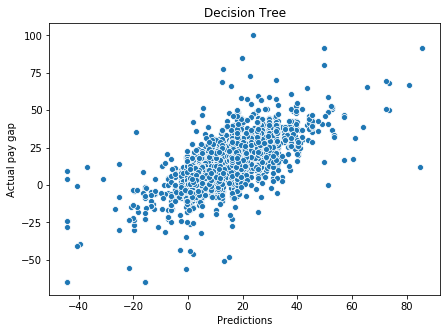

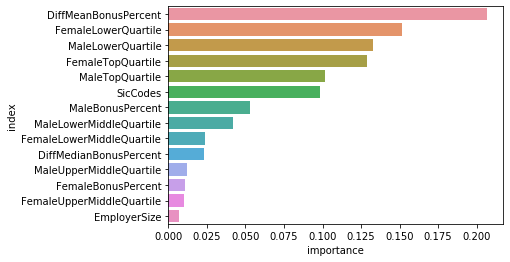

In [44]:
correlatePredictions(decision_tree_model,val_X,val_y,"Decision Tree")
feature_imp(decision_tree_model,train_X)

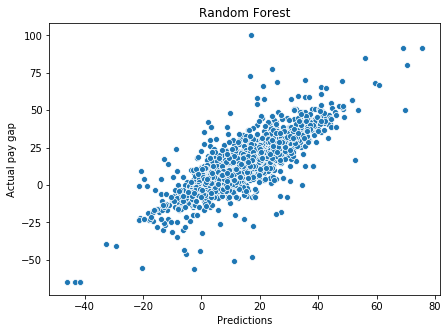

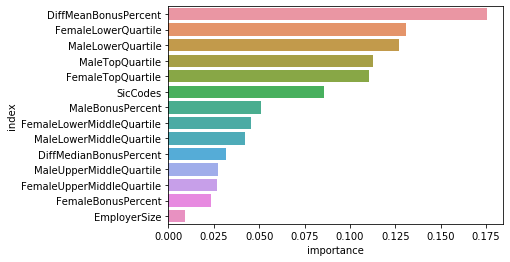

In [45]:
correlatePredictions(forest_model,val_X,val_y,"Random Forest")
feature_imp(forest_model,train_X)

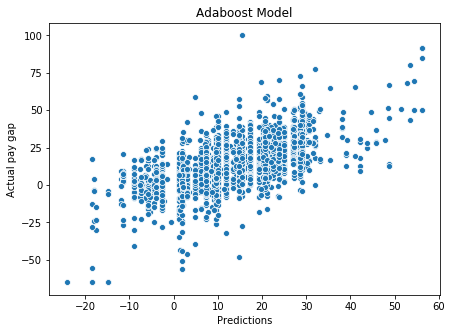

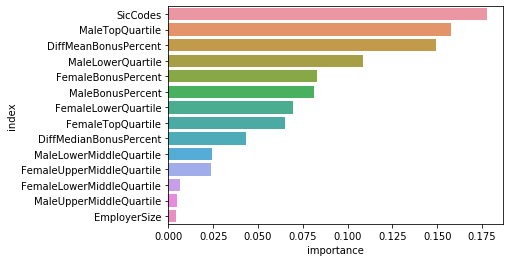

In [46]:
correlatePredictions(adaboost_model,val_X,val_y,"Adaboost Model")
feature_imp(adaboost_model,train_X)

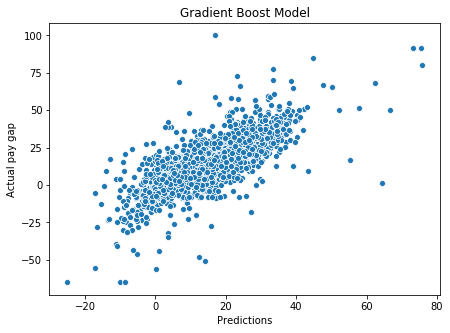

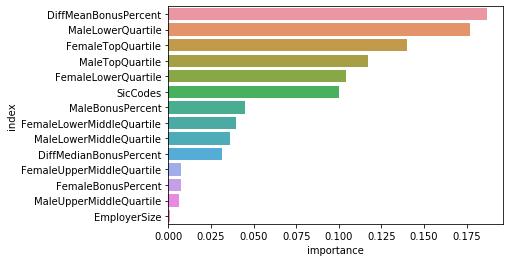

In [47]:
correlatePredictions(gradboost_model,val_X,val_y,"Gradient Boost Model")
feature_imp(gradboost_model,train_X)

In [48]:
#predict median hourly rate
#https://stats.stackexchange.com/questions/131267/how-to-interpret-error-measures
y = new_data.DiffMedianHourlyPercent
features = ['DiffMedianBonusPercent','DiffMeanBonusPercent','MaleBonusPercent',
       'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize','SicCodes']
X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
median_decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
median_forest_model = random_forest(train_X, val_X, train_y, val_y)
median_adaboost_model = adaboost(train_X, val_X, train_y, val_y)
median_gradboost_model = gradboost(train_X, val_X, train_y, val_y)

Decision tree mean absolute error: 7.282629046420693
Decision tree root mean squared error: 10.58474402024897
Decision tree R^2 score:  0.561295083044715
Random forest mae: 4.612492506985014
Random forest rmse: 7.678082122923678
Random forest R^2 score: 0.7691566922718439
Adaboost mae: 10.957402323957178
Adaboost rmse: 14.12654066969233
Adaboost R^2 score 0.2185819638985932
Gradient Boosting mae: 6.706417615413568
Gradient Boosting rmse: 9.705001738247597
Gradient Boosting R^2 score 0.631189719992171


In [49]:
# from sklearn import tree
# import graphviz

# tree_graph = tree.export_graphviz(median_decision_tree_model, out_file=None, feature_names=features)
# graphviz.Source(tree_graph)

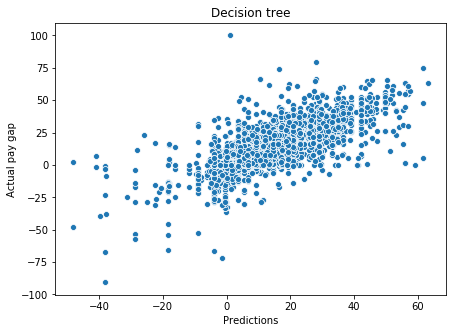

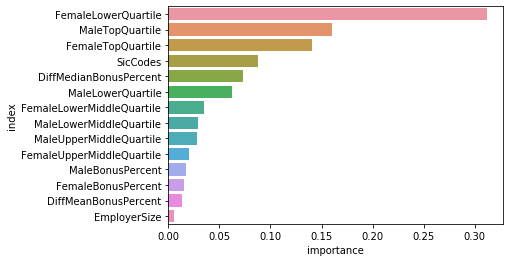

In [52]:
correlatePredictions(median_decision_tree_model,val_X,val_y,"Decision tree")
feature_imp(median_decision_tree_model,train_X)

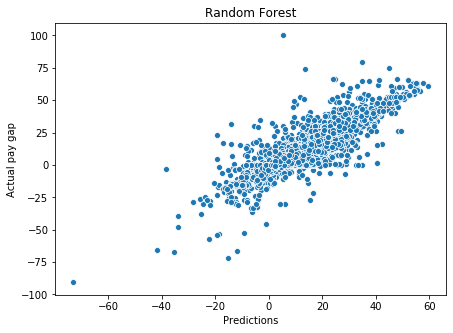

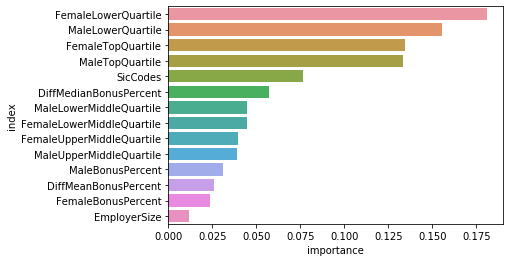

In [53]:
correlatePredictions(median_forest_model,val_X,val_y,"Random Forest")
feature_imp(median_forest_model,train_X)

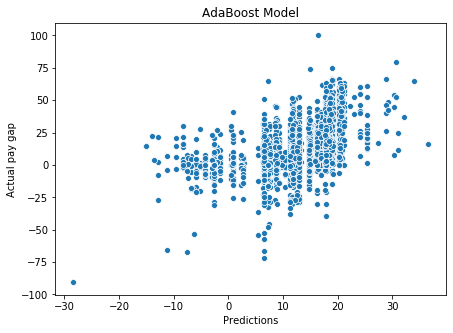

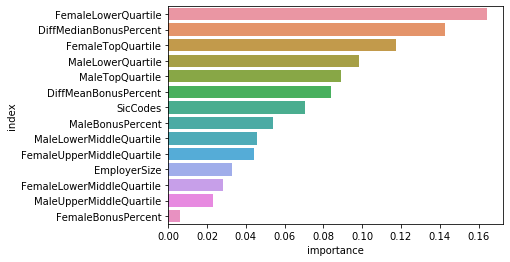

In [54]:
correlatePredictions(median_adaboost_model,val_X,val_y,"AdaBoost Model")
feature_imp(median_adaboost_model,train_X)

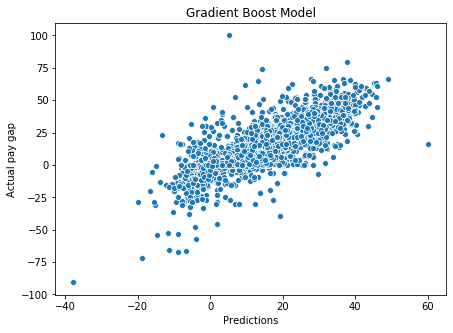

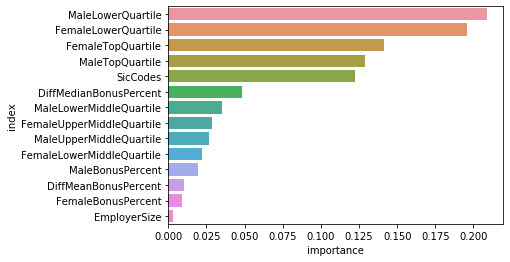

In [55]:
correlatePredictions(median_gradboost_model,val_X,val_y,"Gradient Boost Model")

feature_imp(median_gradboost_model,train_X)

In [56]:
trial_data = data.copy()

In [57]:
new_data.groupby('EmployerSize').count()['DiffMeanHourlyPercent'].sort_values(ascending=False)

EmployerSize
2    7017
3    3814
0    3514
4     808
5     484
1      99
6      11
Name: DiffMeanHourlyPercent, dtype: int64

In [58]:
new_data.groupby('SicCodes').count()['DiffMeanHourlyPercent'].sort_values(ascending=False)

SicCodes
1        1834
85310     654
82990     578
85200     438
84110     383
         ... 
24410       1
24520       1
25290       1
74201       1
46360       1
Name: DiffMeanHourlyPercent, Length: 621, dtype: int64

Imbalance in class...This needs work

## Permutation importance

https://www.kaggle.com/dansbecker/permutation-importance

In [60]:
import eli5
from eli5.sklearn import PermutationImportance

In [61]:
perm = PermutationImportance(median_forest_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.4024 ± 0.0154,FemaleLowerQuartile
0.3215 ± 0.0157,MaleLowerQuartile
0.3052 ± 0.0064,FemaleTopQuartile
0.3035 ± 0.0130,MaleTopQuartile
0.0684 ± 0.0052,MaleLowerMiddleQuartile
0.0623 ± 0.0032,FemaleLowerMiddleQuartile
0.0622 ± 0.0073,SicCodes
0.0586 ± 0.0036,DiffMedianBonusPercent
0.0438 ± 0.0033,MaleUpperMiddleQuartile
0.0433 ± 0.0027,FemaleUpperMiddleQuartile


In [62]:
perm = PermutationImportance(median_gradboost_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.2484 ± 0.0183,FemaleLowerQuartile
0.2325 ± 0.0071,FemaleTopQuartile
0.2178 ± 0.0105,MaleLowerQuartile
0.2049 ± 0.0138,MaleTopQuartile
0.0935 ± 0.0063,SicCodes
0.0622 ± 0.0053,FemaleLowerMiddleQuartile
0.0565 ± 0.0051,MaleLowerMiddleQuartile
0.0552 ± 0.0045,FemaleUpperMiddleQuartile
0.0292 ± 0.0030,MaleUpperMiddleQuartile
0.0197 ± 0.0022,DiffMedianBonusPercent


## Partial dependence plot

In [49]:
from pdpbox import pdp, get_dataset, info_plots

In [76]:
def pdpFunction(model,data,features,feature_to_plot):
    pdp_score = pdp.pdp_isolate(model=model, dataset=data, model_features=features,
                                feature=feature_to_plot)
    pdp.pdp_plot(pdp_score, feature_to_plot)
    plt.show()
    #pdp.plt.savefig('Visualizations/'+feature_to_plot+'.png')

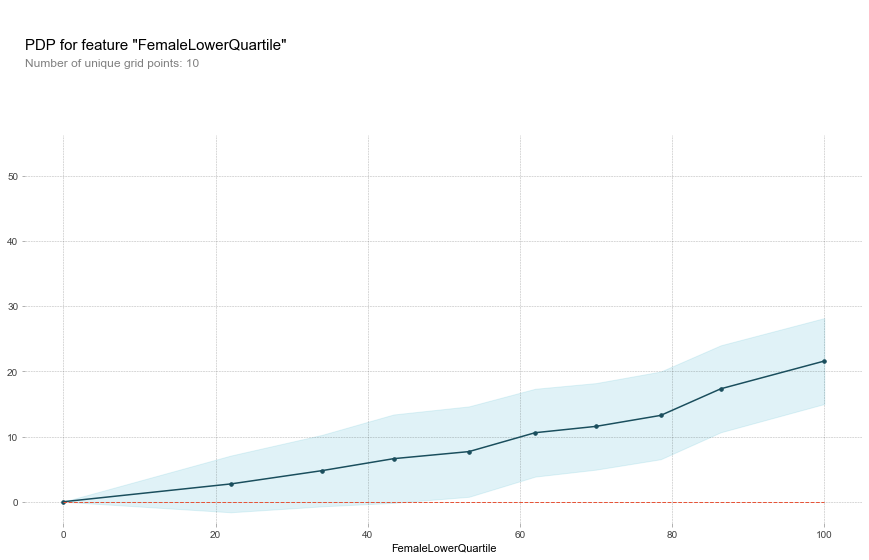

In [77]:
pdpFunction(median_forest_model,val_X,features,'FemaleLowerQuartile')

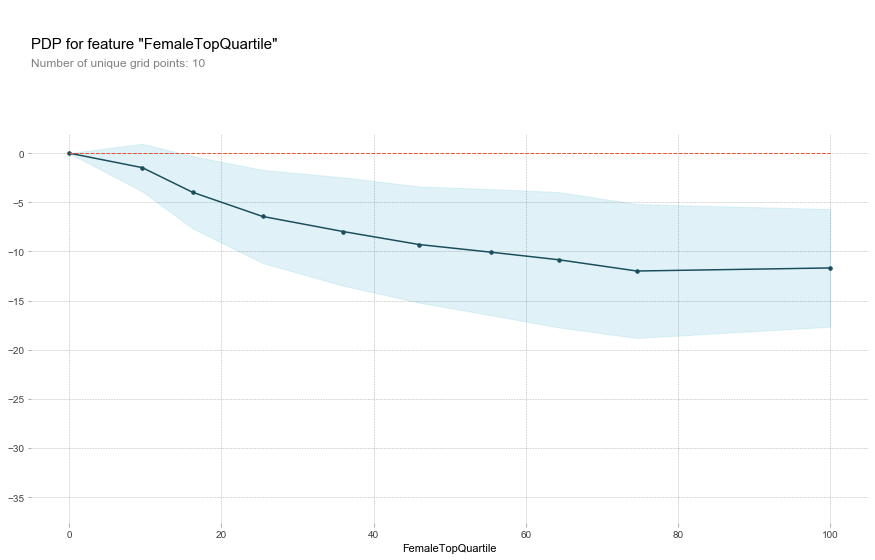

In [78]:
pdpFunction(median_forest_model,val_X,features,'FemaleTopQuartile')

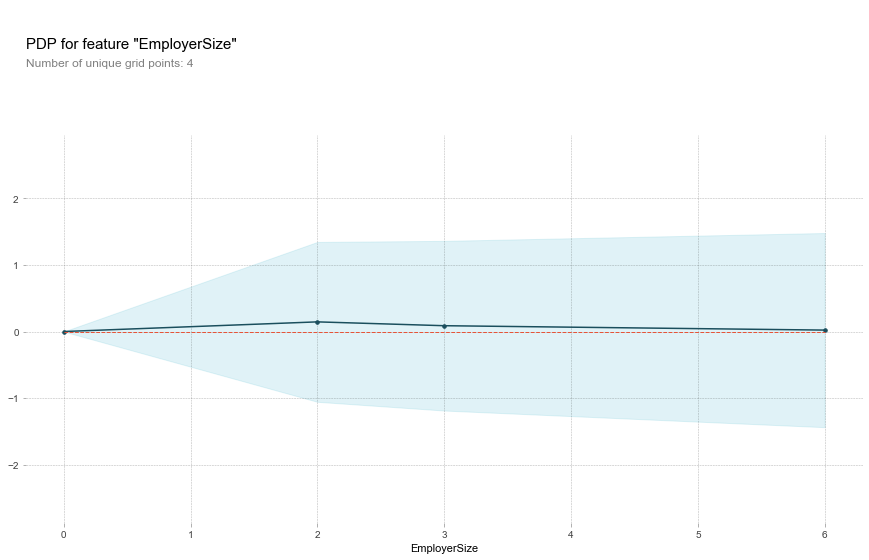

<Figure size 432x288 with 0 Axes>

In [75]:
pdpFunction(median_forest_model,val_X,features,'EmployerSize')

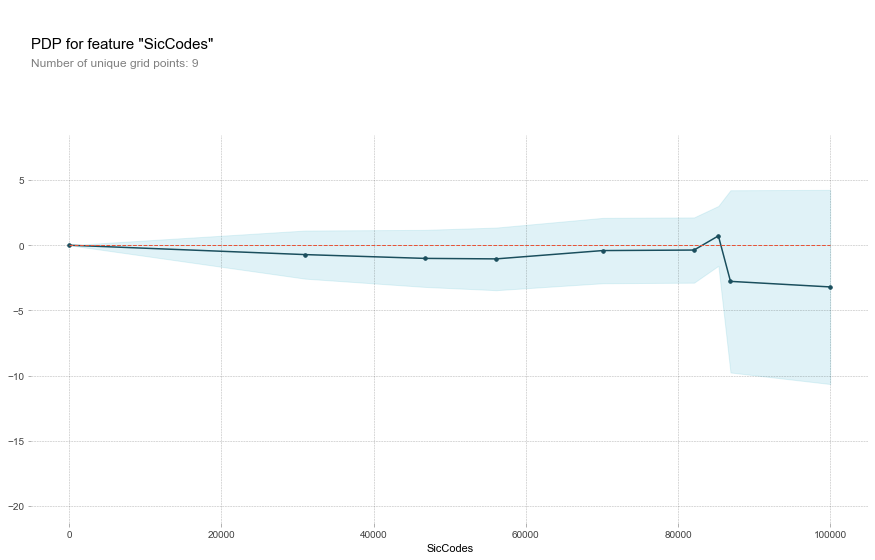

In [65]:
pdpFunction(median_forest_model,val_X,features,'SicCodes')

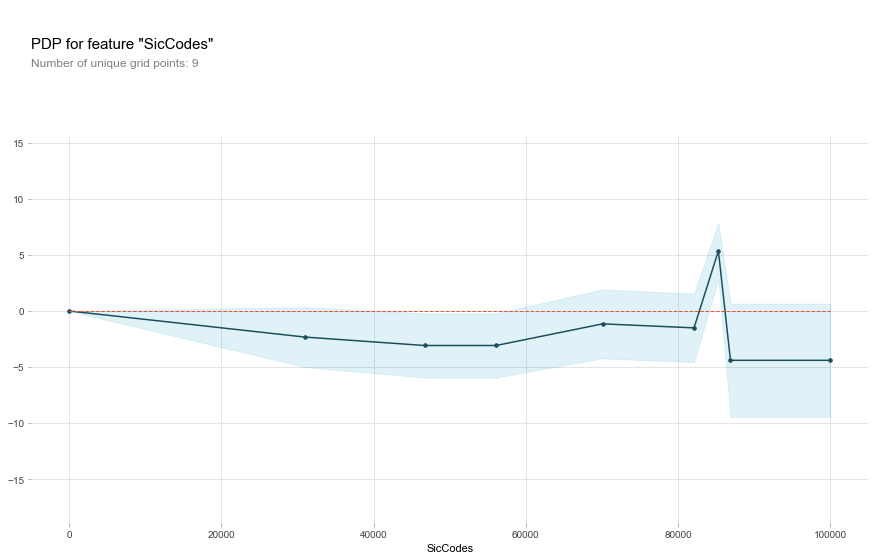

In [66]:
pdpFunction(median_gradboost_model,val_X,features,'SicCodes')

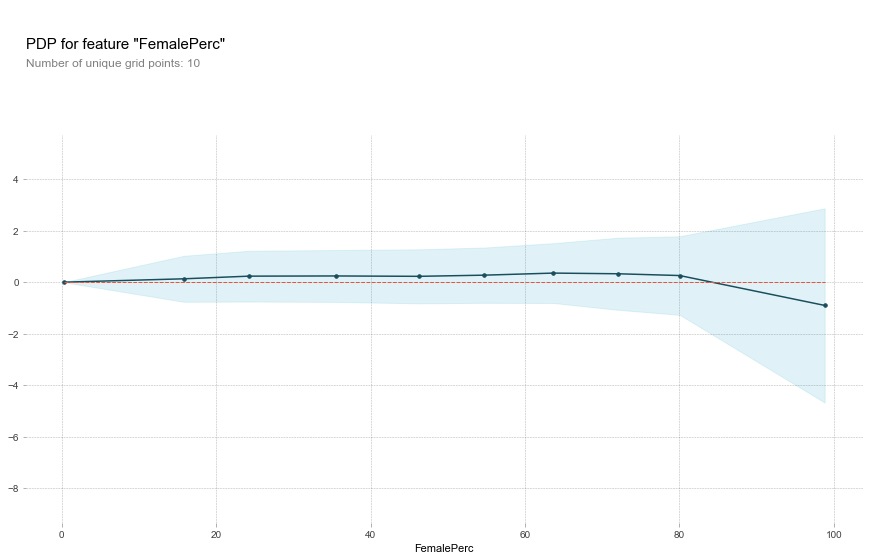

In [67]:
pdpFunction(median_forest_model,val_X,features,'FemalePerc')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


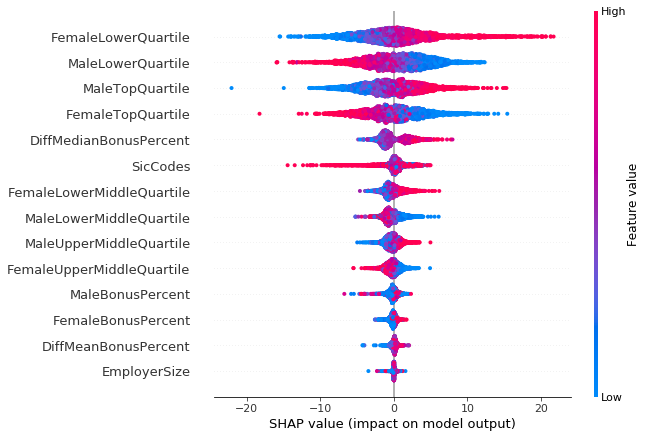

In [63]:
# https://github.com/slundberg/shap
# this takes time
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(median_forest_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)


shap.summary_plot(shap_values, val_X)

The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


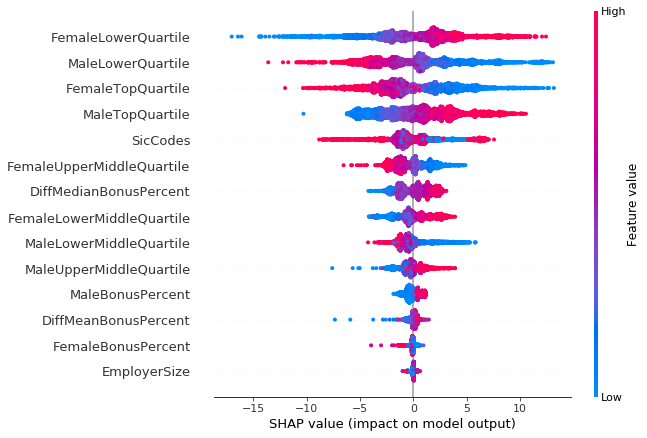

In [64]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(median_gradboost_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)


shap.summary_plot(shap_values, val_X)